In [76]:
# import libraries we need
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import datetime # manipulating date formats

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


%matplotlib inline

# import datasets
items = pd.read_csv(os.path.join('./data/', 'items.csv'), low_memory=False, parse_dates=True)
categories = pd.read_csv(os.path.join('./data/', 'item_categories.csv'), low_memory=False, parse_dates=True)
data_train = pd.read_csv(os.path.join('./data/', 'sales_train.csv'), low_memory=False, parse_dates=True)
shops = pd.read_csv(os.path.join('./data/', 'shops.csv'), low_memory=False, parse_dates=True)
data_test = pd.read_csv(os.path.join('./data/', 'test.csv'), low_memory=False, parse_dates=True)

In [87]:
df = items.merge(categories, on='item_category_id')
df = df.merge(data_train,on='item_id')
df = df.merge(shops,on='shop_id')

In [88]:
df.head()

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day,shop_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD,01.09.2014,20,54,58.0,1.0,"Химки ТЦ ""Мега"""
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,24.08.2014,19,54,58.0,1.0,"Химки ТЦ ""Мега"""
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD,12.11.2014,22,54,58.0,1.0,"Химки ТЦ ""Мега"""
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,05.07.2014,18,54,100.0,1.0,"Химки ТЦ ""Мега"""
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD,26.08.2014,19,54,58.0,1.0,"Химки ТЦ ""Мега"""


In [93]:
df['date'] = pd.to_datetime(df['date'])

In [94]:
df['date']

0         2014-09-01
1         2014-08-24
2         2014-11-12
3         2014-07-05
4         2014-08-26
             ...    
2935844   2015-10-01
2935845   2015-10-02
2935846   2015-10-03
2935847   2015-10-01
2935848   2015-10-02
Name: date, Length: 2935849, dtype: datetime64[ns]

In [90]:
df.date=df.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

In [91]:
df.date

0         2014-09-01
1         2014-08-24
2         2014-11-12
3         2014-07-05
4         2014-08-26
             ...    
2935844   2015-10-01
2935845   2015-10-02
2935846   2015-10-03
2935847   2015-10-01
2935848   2015-10-02
Name: date, Length: 2935849, dtype: datetime64[ns]

In [95]:
df['month'] = df.date.apply(lambda x: datetime.strptime(x, '%d-%m-%Y').strftime('%m'))
df['year'] = df.date.apply(lambda x: datetime.strptime(x, '%d-%m-%Y').strftime('%Y'))

AttributeError: module 'datetime' has no attribute 'strptime'

In [49]:
df[df['item_price']<0]

,item_name,item_id,item_category_id,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day,shop_name


In [55]:
df = df[df['item_price']>0]

In [56]:
monthly_sales=df.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

In [58]:
monthly_sales

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-21 2013-03-01      221.0          6.0
                       33      2013-01-17 2013-03-01      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
...                                   ...        ...        ...          ...
33             59      22087   2015-05-10 2015-10-23      119.0          6.0
                       22088   2015-03-10 2015-10-27      119.0          2.0
                       22091   2015-03-10 2015-03-10      179.0          1.0
                       22100   2015-10-18 2015-10-18      629.0          1.0
                       22102   2015-10-16 2015-10-16     1250.0          1.0

[1609124 rows x 4 columns]

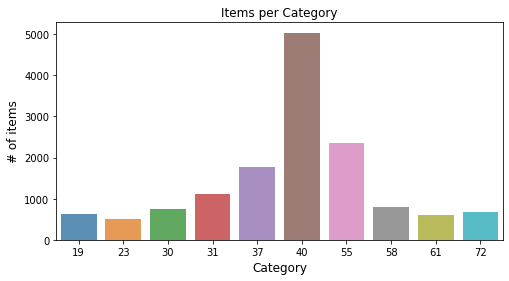

In [60]:
# number of items per cat 
x=items.groupby(['item_category_id']).count()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.item_category_id, x.item_id, alpha=0.8)
plt.title("Items per Category")
plt.ylabel('# of items', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()